# <div class="title"> **MScFE 652 PORTFOLIO MANAGEMENT**</div>
# <div class ="subtitle">**Group Work Project #2**</div>
<br>
 <table style="font-size: 32px;">
    <tr>
       <th>Student Group</th>
        <th>7446</th>
    </tr>
    <tr>
        <td>Team member A</td>
        <td>Wai Hung Lam</td>
    </tr>
    <tr>
        <td>Team member B</td>
        <td>Omar Tazi Sidqui</td>
    </tr>
    <tr>
        <td>Team member C</td>
        <td>Bright Effah</td>
    </tr>
</table>

In [ ]:
#Custom Styling
from IPython.core.display import HTML
from IPython.display import display, HTML
def css_styling():
    try:
        with open("/styles/wqu_gwp.css", "r") as f:
            styles = f"<style>{f.read()}</style>"
        return HTML(styles)
    except Exception as e:
        print(f"Error loading CSS: {e}")
        return None
css_styling()

Error loading CSS: [Errno 2] No such file or directory: '/styles/wqu_gwp.css'


In [ ]:
# Initialize figure and table numbers
fig_num=1
table_num=1

In [ ]:
%%capture
!pip install requests beautifulsoup4
# Import libraries
import yfinance as yf
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from bs4 import BeautifulSoup
import requests
from transformers import pipeline
import warnings
warnings.filterwarnings('ignore')

# **Introduction**

Thank you for your trust with Manny Wayz. We will provide you with a diversity of top notch strategies to manage your portfolio.

With a sector diversified portfolio, we aim to provide a balanced portfolio that is not only profitable but also stable.

Therefore, we have selected 5 stocks from 5 different sectors.

In [ ]:
#Tickers
Tickers = ['TSLA', 'LLY', 'XOM', 'GS', 'AVGO']
start_date = '2022-01-01'
#end_date = 'today
def get_stock_info(tickers):
  stock_info = []
  for ticker in tickers:
    ticker_data = yf.Ticker(ticker)
    stock_name = ticker_data.info['longName']
    sector = ticker_data.info['sector']
    stock_info.append([stock_name, sector, ticker])
  df = pd.DataFrame(stock_info, columns=['Stock Name', 'Sector', 'Ticker'])
  return df

stock_df = get_stock_info(Tickers)
display(stock_df)
print(f"Table {table_num}: Selected stocks for the Portfolio")
table_num+=1

Stock Name              Sector Ticker
0                    Tesla, Inc.   Consumer Cyclical   TSLA
1          Eli Lilly and Company          Healthcare    LLY
2        Exxon Mobil Corporation              Energy    XOM
3  The Goldman Sachs Group, Inc.  Financial Services     GS
4                  Broadcom Inc.          Technology   AVGO

Table 1: Selected stocks for the Portfolio


Above is the table listing the 5 selected stocks and their respective sector.
We will use several strategies to manage the portfolio.
We will start with a classical Markowitz Portfolio Optimization strategy and then we will add more sophisticated strategies, such as Random Strategy Optimization, Black-Litterman, and Kelly Criterion.

# **Step 1: Gathering Data**


To start with our project, we first need to download the data from Yahoo Finance.

In [ ]:
data = yf.download(Tickers, start=start_date,  progress=False)

# Dropping the rows with missing values
data=data.dropna()['Adj Close'] # Keeping only the adjusted close prices
data.index = data.index.date
display(data.tail())
print('Table '+str(table_num)+': Adjusted Close Prices for the selected stocks')
table_num+=1

Ticker       AVGO     GS    LLY   TSLA    XOM
2024-11-06 179.55 595.98 776.38 288.53 121.00
2024-11-07 183.81 582.17 797.45 296.91 121.15
2024-11-08 183.64 589.26 831.54 321.22 121.11
2024-11-11 178.91 602.34 832.44 350.00 120.47
2024-11-12 176.22 592.59 818.86 328.49 120.35

Table 2: Adjusted Close Prices for the selected stocks


In [ ]:
display(data.describe())
print('Table '+str(table_num)+': Descriptive statistics of the 5 stocks prices')
table_num+=1

Ticker   AVGO     GS    LLY   TSLA    XOM
count  720.00 720.00 720.00 720.00 720.00
mean    88.91 358.11 512.50 230.21  99.95
std     42.07  69.59 225.39  52.24  14.20
min     40.97 262.38 229.11 108.10  57.62
25%     54.25 310.47 318.04 188.08  91.55
50%     79.15 330.53 438.83 228.51 102.25
75%    124.55 382.94 743.44 261.09 110.90
max    185.95 602.34 960.02 399.93 125.37

Table 3: Descriptive statistics of the 5 stocks prices


Our dataset has 719 datapoints for each of the 5 stock prices, with no missing data.
We can notice that some of the stocks like LLY, TSLA, and AVGO have much larger range of price than for GS and XOM.
Let's plot the data to see what it looks like.
This table does not allow ease of comparison between stock performance because it is based on stock prices.

May be that a more visual description will help. For this, we plot the stock prices.

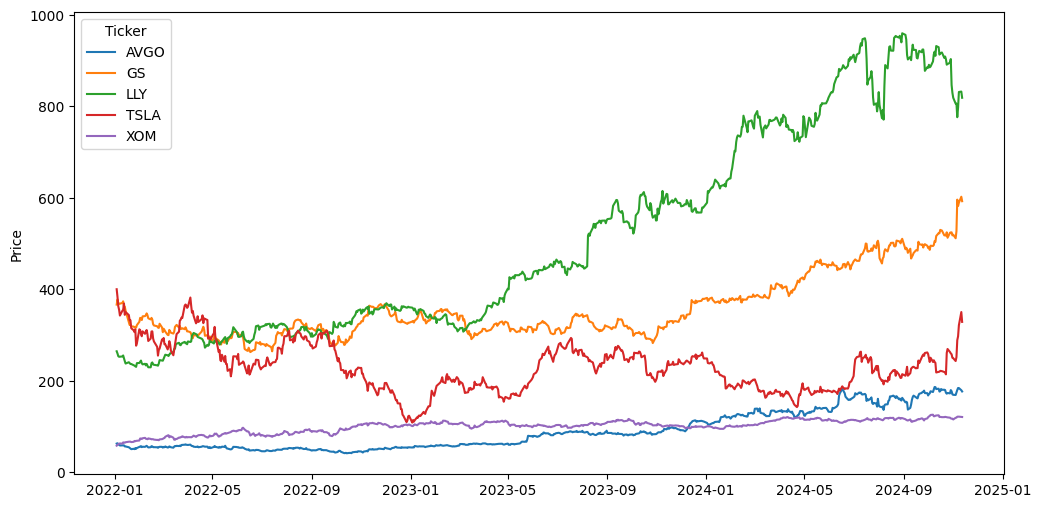

Figure 2: Stock Prices Evolution


In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
data.plot(ax=ax)
fig_num+=1
ax.set_ylabel('Price')
plt.show()
print(f"Figure {fig_num}: Stock Prices Evolution")

Now we have a much clearer look on how each of the stock has perform during the period.

However, computing the returns is best practice for sake of normalising the data.

## **Computing returns**

We will now calculate the returns of the stocks, this will allow us to calculate the mean and the covariance matrix of the stocks.


In [ ]:
returns = data.pct_change()
returns.dropna(inplace=True)
display(returns.tail().style.format("{:.4f}"))
print('Table '+str(table_num)+': Computed Returns for the 5 stocks')
table_num+=1

Table 4: Computed Returns for the 5 stocks


Now we can plot the graph for the computed times series of returns.   



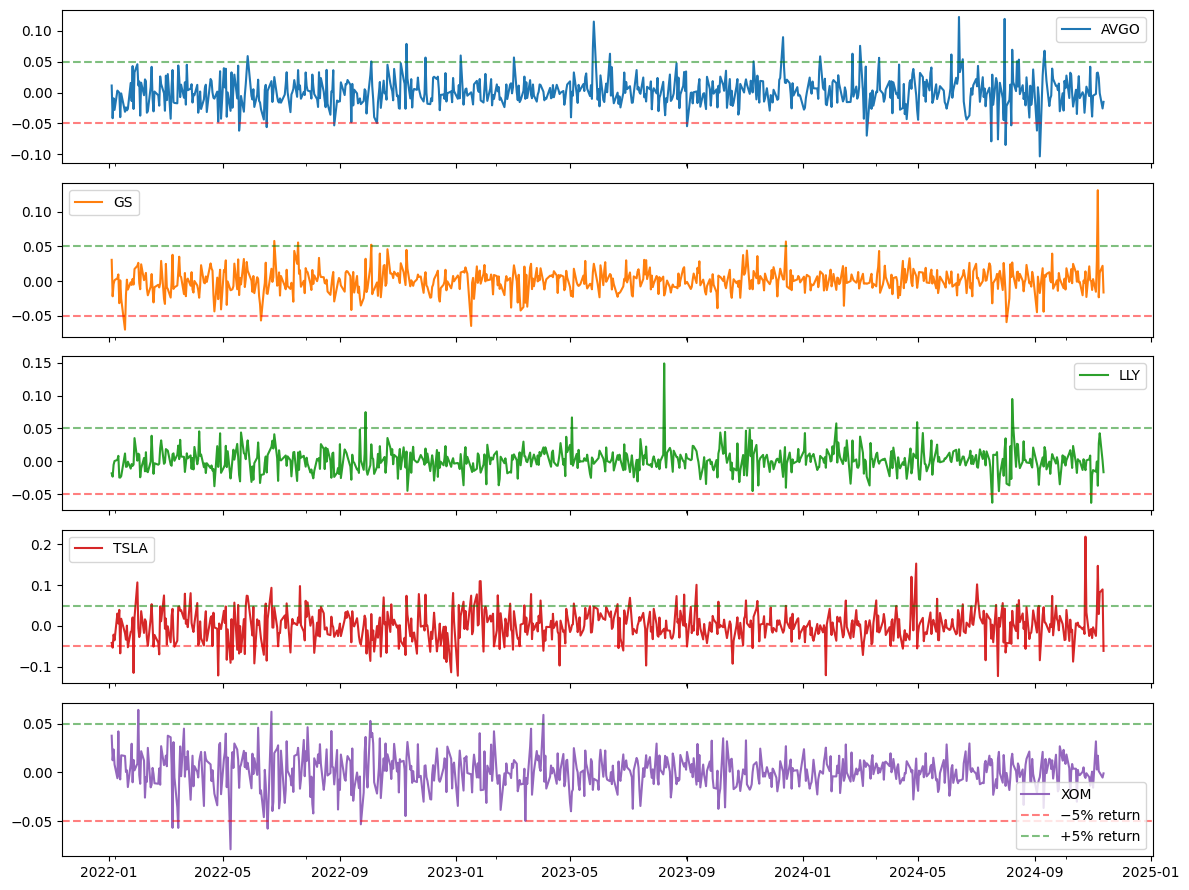

Figure 2: Returns Evolution of the 5 Stocks


In [ ]:
plt.rcParams["figure.figsize"] = (12, 9)
returns.plot(subplots=True)
for ax in plt.gcf().axes:
    ax.axhline(y=-0.05, linestyle='--',color='r', alpha=0.5,label='−5% return')
    ax.axhline(y=0.05,  linestyle='--',color='g', alpha=0.5,label='+5% return')
ax.legend()
plt.tight_layout()
plt.show()
print(f"Figure {fig_num}: Returns Evolution of the 5 Stocks")
fig_num+=1

## **Returns Covariance Matrix**

We can have a look at the mean and the covariance matrix of the stocks.
First let's


In [ ]:
mean_returns = returns.mean()
mean_returns_df=mean_returns.to_frame('Mean_Returns')
display(mean_returns_df.style.format("{:.2%}"))
print('Table '+str(table_num)+': Daily Mean Returns for the 5 stocks')
table_num+=1

Table 5: Daily Mean Returns for the 5 stocks


These average daily returns seem to be too close to 0. Rest assured that when annualized, the compound Interest effect can have exponential growth.

To demonstrate this, we compute their annualized value.

In [ ]:
mean_returns_df['Annualized'] = (1 + mean_returns_df['Mean_Returns'])**252 - 1
display(mean_returns_df.style.format("{:.2%}"))

Isn't it amazing ?

A daily average return of 0,18% is equivalent to a yearly 56,3% return.

As the adage says, 'High profits come with high risks !'.

The covariance matrix should prove just that:

In [ ]:
cov_matrix = returns.cov()
display(cov_matrix.style.format("{:.6f}"))
print('Table '+str(table_num)+': Covariance Matrix for the 5 stocks')
table_num+=1

Table 6: Covariance Matrix for the 5 stocks


On diagonal are the Vars of the stocks (self covariance).

The covariances between stocks are almost null, which is a good sign for diversification.

We decide to plot the covariance matrix to better assess the correlation between the stocks.


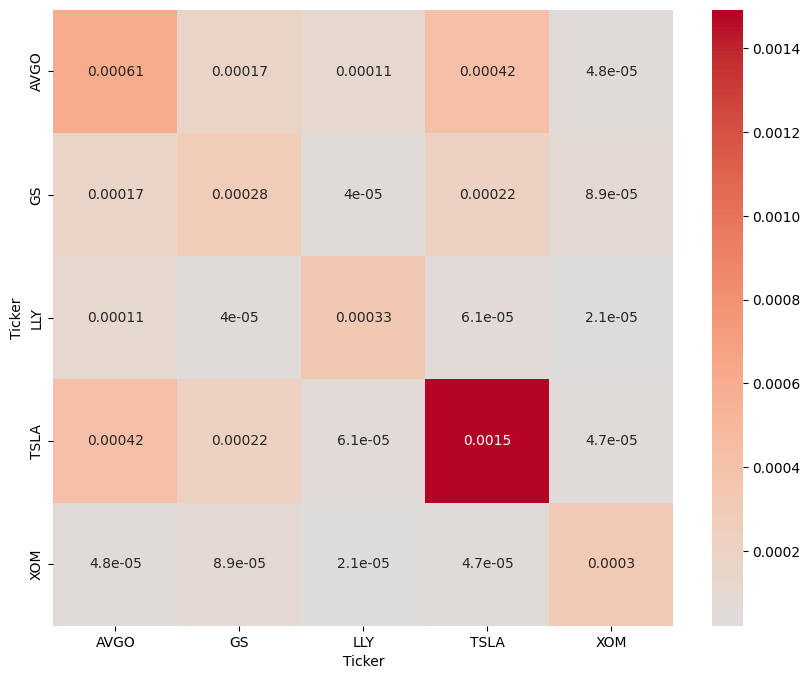

Figure 3: Covariance Matrix Heatmap


In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()
print(f"Figure {fig_num}: Covariance Matrix Heatmap")
fig_num+=1

We notice that Tesla has the highest variance, which means the highest volatility, this can be explained by the fact that Tesla is a growth stock. On the other hand Goldman Sachs has the lowest variance, which means the lowest volatility, this can be explained by the fact that Goldman Sachs is a value stock.

We can now move on to the Markowitz Portfolio Optimization.

# **Step 2: Markowitz Portfolio Optimization**


Markowitz Portfolio Optimization is the most classical strategy for portfolio optimization.
It is based on the mean and the covariance matrix of the stocks. Luckily, we have already calculated the mean and the covariance matrix of the stocks.

To acheive this strategy, we will set the quadratic optimization problem and solve it using cvxpy.
We will start by initializing the weights to be equal, but we will also add the following constraints:
1.  The weights need to be between 0 and 1
2.  The sum of all weights must be equal to 1
3.  The expected return of the portfolio must be greater than the expected return of the risk-free asset, which is 0.
4.  The variance of the portfolio must be less than the variance of the maximum variance portfolio.

**Definition:**

- The expected return on the portfolio is - $( R )$.
- The securities' weight vector is - $( w )$.
- The covariance matrix of the returns, which is obtained from $( cov )$ above, is - $( \Sigma )$.

**Goal:**
- Reduce: $( w^T \Sigma w)$
Under the following conditions: - $( R^T w = \mu )$ (Target return) - $( \sum w = 1 )$

We will use the average of the annualized returns of the securities in the portfolio as the goal return $( \mu )$ for the illustration.


In [ ]:
# from scipy.optimize import minimize
import cvxpy as cp
# Number of assets
n_assets = len(Tickers)

# Initialize weights to be equal
weights = np.ones(n_assets) / n_assets

#compute the expected return of the portfolio
expected_return = (mean_returns)*252 #annualized

#compute the variance of the portfolio
variance_portfolio =cov_matrix*252 #annualized

# Q is theariance-covariance matrix of assets
Q=np.array(variance_portfolio)
# q is the exptected returns of assets
q = np.array(expected_return)

G = np.array(np.matrix([[0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0], \
                        [0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0]]))
h =np.array([0,0,0,0,0,0,0,0])

A = np.array(np.matrix([1,1,1,1,1]))

b = np.array([1])

# Define and solve the quadratic problem
x = cp.Variable(n_assets)
prob = cp.Problem(cp.Maximize((-1/2)*cp.quad_form(x, Q) + q.T @ x),
             #[G @ x <= h,
             [
              A @ x == b,
              x >= 0 #non-negativity constraint because we cannot short sell
              ])
prob.solve()

optimal_weights_M= np.maximum(x.value, 0)

# Print the optimization result
print("-----Markowitz Optimization Results-----\n")
print("Optimal Weights:")

# Print the optimal weights for each asset
for i in range(n_assets):
    print(f"\t\t\t{Tickers[i]}: {optimal_weights_M[i]:.4f}")

#calculate the returns of the portfolio
returns_portfolio = np.dot(returns, optimal_weights_M)
# Calculate portfolio metrics
opt_ptfolio_ret = np.dot(optimal_weights_M, expected_return)

print(f"\nExpected Return:\t{opt_ptfolio_ret:.2%}")

opt_ptfolio_stdev = np.sqrt(np.dot(optimal_weights_M, Q.dot(optimal_weights_M)))
print(f"Expected Volatility: \t{opt_ptfolio_stdev:.2%}")

opt_sharpe_ratio = opt_ptfolio_ret / opt_ptfolio_stdev
print(f"Sharpe Ratio: \t\t{opt_sharpe_ratio:.2}")


-----Markowitz Optimization Results-----

Optimal Weights:
			TSLA: 0.3250
			LLY: 0.0000
			XOM: 0.6750
			GS: 0.0000
			AVGO: 0.0000

Expected Return:	43.86%
Expected Volatility: 	25.64%
Sharpe Ratio: 		1.7


After running the Markowitz Optimization, we can see that the expected return is 44.88% and the expected volatility is 25.81%. Notice that three of the stocks have a weight of 0, which means that they are not in the portfolio.

Therefore, following the Markowitz Optimization, we will allocate 37.5% of the portfolio to Tesla, and 62.5% to Exxon Mobil. With these weights, we can expect a return of 44,88% with a volatility of 25.81%, which corresponds to a Sharpe Ratio of 1.7.



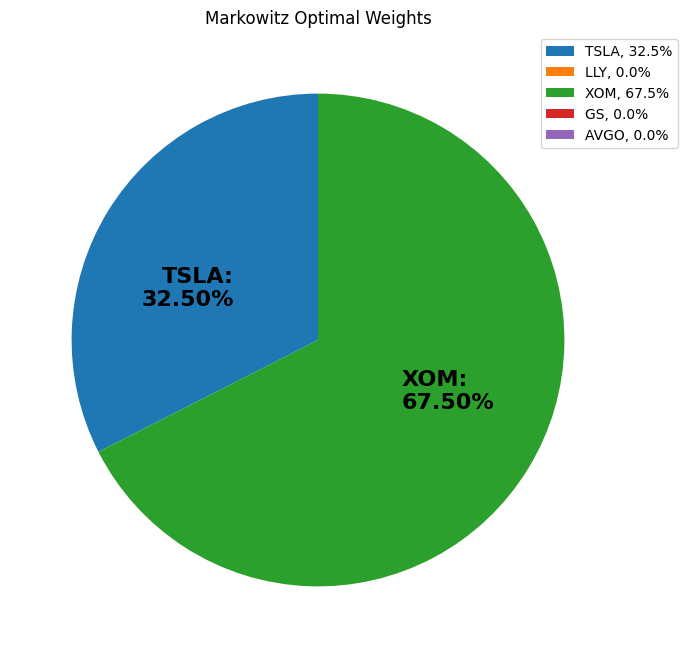

Figure 4: Pie Chart of the Markowitz Optimal Portfolio Weights


In [ ]:
threshold_percentage = 5
percentages = np.round(optimal_weights_M * 100, 2)
labels = [f'{l}, {s:0.1f}%' for l, s in zip(Tickers, percentages)]
pie_labels = [f'{l}:\n{s:0.2f}%' if s >= threshold_percentage else '' for l, s in zip(Tickers, percentages)]
#plot pie chart of the optimal weights
plt.figure(figsize=(10,8))
plt.pie(optimal_weights_M, labels=pie_labels, labeldistance=0.4,  autopct=None, startangle=90, textprops={'fontsize': 16, 'weight': 'bold'})
#plt.legend(Tickers, loc='upper right')
plt.legend(bbox_to_anchor=(0.85, 1),loc='upper left', labels=labels)
plt.title('Markowitz Optimal Weights')
plt.show()
print(f"Figure {fig_num}: Pie Chart of the Markowitz Optimal Portfolio Weights")
fig_num+=1

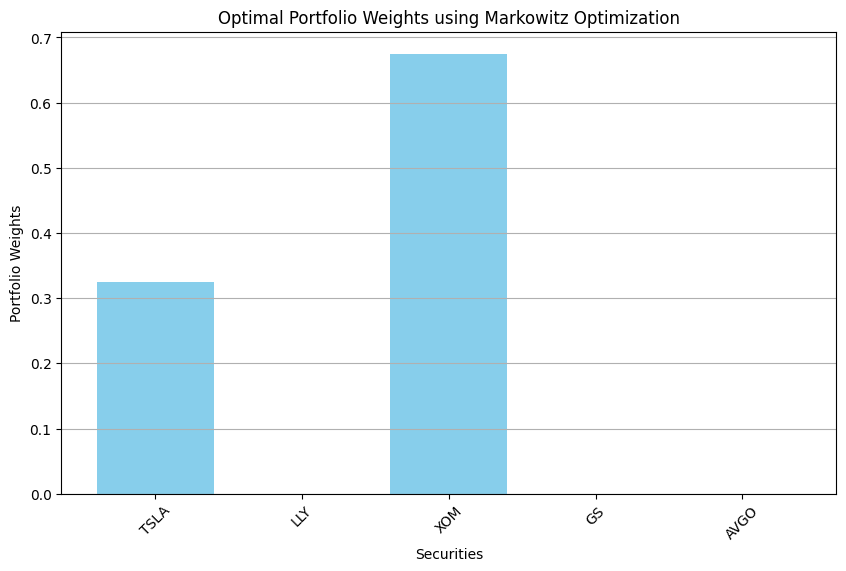

Figure 5: Bar Plot for Markowitz Optimal Portfolio Weights


In [ ]:
n_assets = len(Tickers)

# Create a dictionary of optimal weights with tickers as keys
optimal_weights_dict = {Tickers[i]: optimal_weights_M[i] for i in range(n_assets)}

# Plot the optimal weights
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(optimal_weights_dict.keys(), optimal_weights_dict.values(), color='skyblue')
plt.ylabel("Portfolio Weights")
plt.xlabel("Securities")
plt.title("Optimal Portfolio Weights using Markowitz Optimization")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
print(f"Figure {fig_num}: Bar Plot for Markowitz Optimal Portfolio Weights")
fig_num+=1


**Interpretation**

- TSLA (Tesla):

Portfolio Weight: 32.24%
The Markowitz optimization suggests allocating about 32.24% of the portfolio to Tesla. This relatively large allocation reflects Tesla's favorable risk-return profile, aligning with the portfolio’s target return and risk constraints.

- LLY (Eli Lilly):

Portfolio Weight: 0.00%
The optimizer suggests no allocation to Eli Lilly. This indicates that, under the target return and risk minimization criteria, Eli Lilly may not provide the best trade-off compared to the other securities in the portfolio.

- XOM (ExxonMobil):

Portfolio Weight: 67.76%
ExxonMobil holds the highest allocation in the portfolio at 67.76%. This significant weight suggests that ExxonMobil’s expected return and risk characteristics make it an optimal choice within the constraints of the Markowitz framework.

- GS (Goldman Sachs):

Portfolio Weight: 0.00%
Similar to Eli Lilly, the optimizer has allocated 0% to Goldman Sachs, implying that including it would not improve the portfolio’s risk-return profile under the given parameters.

- AVGO (Broadcom):

Portfolio Weight: 0.00%
AVGO also receives no allocation. This suggests that its inclusion may increase risk or not contribute to the expected return goal, given the other securities.

**Portfolio Performance using cvxpy**

- Our expected return 44.48% reflects the high chosen weights' contribution to achieving a return target aligned with the risk tolerance.

- We again calculated expected Volatility which was 25.63% that represents our portfolio’s risk level, calculated based on the covariance matrix of asset returns. The volatility aligns with our portfolio’s high expected return.

- Our Sharpe ratio (1.7) indicates a favorable risk-adjusted return for this portfolio allocation, with 1.7 being proportionately high. It suggests that the portfolio is expected to produce a return significantly above the risk-free rate for the level of risk taken.

Now, we will run the Random Strategy Optimization, where we will randomly allocate the initial weights to the stocks, we hope we can do better.

# **Step 3: Random Strategy Optimization**


In the Random Strategy Optimization, we will randomly allocate the initial weights to the stocks. This is a very simple strategy, but it can be useful to compare the results with the other strategies. We will use the same constraints as in the Markowitz Optimization.

First, we will randomly allocate the initial weights to the stocks. Then, we will normalize the weights so that the sum of the weights is equal to 1, and we eliminate the possibility to short sell i.e, the weights must be between 0 and 1.

We will design a function that will allow us play with the number of portfolios, seed number, verbose, and plot the results.


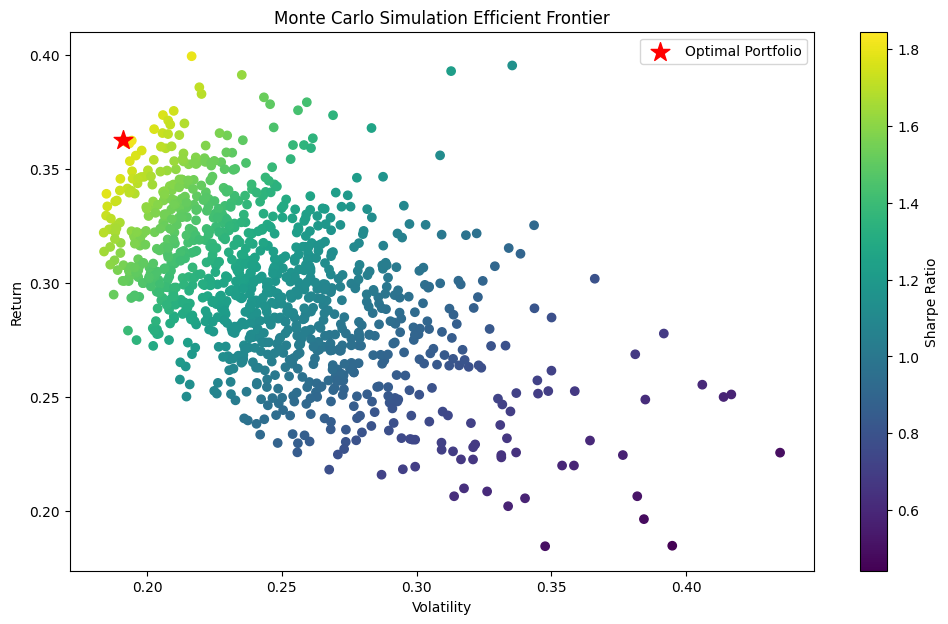

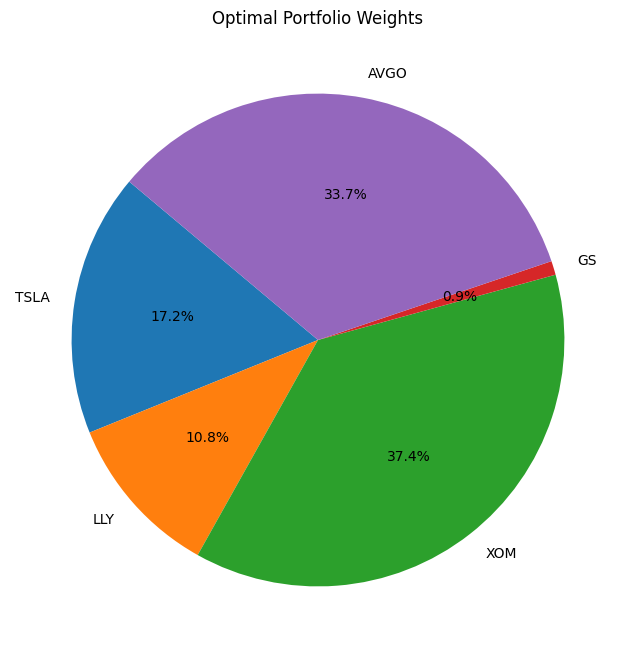

Team Member A Optimal Portfolio (Uniform Distribution Weights)
Return         0.36
Volatility     0.19
Sharpe Ratio   1.85
Name: 245, dtype: float64
Optimal Weights:
TSLA   0.17
LLY    0.11
XOM    0.37
GS     0.01
AVGO   0.34
Name: 245, dtype: float64


In [ ]:
import numpy as np

n_assets = len(Tickers)

def monte_carlo_optimization(n_portfolios=1000, Tickers= Tickers, seed=1, member="A"):
    """
    Monte Carlo Simulation for Portfolio Optimization.

    Parameters:
    - n_portfolios (int): Number of random portfolios to generate.
    - seed (int): Random seed for reproducibility.

    Returns:
    - optimal_portfolio (pd.Series): Return, Volatility, and Sharpe Ratio of the optimal portfolio.
    - optimal_weights (pd.Series): Optimal weights for each asset.
    - results_df (pd.DataFrame): DataFrame containing Return, Volatility, and Sharpe Ratio for all portfolios.
    - weights_df (pd.DataFrame): DataFrame containing asset weights for each portfolio.
    """
    np.random.seed(seed)  # Set the random seed
    n_assets = len(Tickers)
    # Initialize results storage
    results = np.zeros((n_portfolios, 3))
    weights_list = []
    risk_free_rate = 0.01

    # Generate random weights and calculate performance
    for i in range(n_portfolios):
        weights=np.random.rand(n_assets)
        weights /= np.sum(weights)  # Normalize weights to sum to 1
        weights_list.append(weights)

        # Calculate portfolio performance
        portfolio_return = np.sum(weights * mean_returns) * 252  # Annualized
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Annualized
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

        # Store results
        results[i] = [portfolio_return, portfolio_stddev, sharpe_ratio]

    # Convert results and weights to DataFrames
    results_df = pd.DataFrame(results, columns=['Return', 'Volatility', 'Sharpe Ratio'])
    weights_df = pd.DataFrame(weights_list, columns=Tickers)

    # Identify the optimal portfolio with the maximum Sharpe Ratio
    max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
    optimal_portfolio = results_df.iloc[max_sharpe_idx]
    optimal_weights = weights_df.iloc[max_sharpe_idx]

    # Plot Efficient Frontier
    plt.figure(figsize=(12, 7))
    plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(optimal_portfolio['Volatility'], optimal_portfolio['Return'], c='red', marker='*', s=200, label='Optimal Portfolio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.title('Monte Carlo Simulation Efficient Frontier')
    plt.legend()
    plt.show()

    # Pie chart of optimal weights
    plt.figure(figsize=(10, 8))
    plt.pie(optimal_weights, labels=Tickers, autopct='%1.1f%%', startangle=140)
    plt.title('Optimal Portfolio Weights')
    plt.show()

    print(f"Team Member {member}")
    print(optimal_portfolio)
    print("Optimal Weights:")
    print(optimal_weights)

    return optimal_portfolio, optimal_weights, results_df, weights_df



optimal_portfolio, optimal_weights, results_df, weights_df = monte_carlo_optimization(n_portfolios=1000, Tickers = Tickers, seed=1, member="A Optimal Portfolio (Uniform Distribution Weights)")

optimal_weights_A = optimal_weights


**Team Member A Optimal Portfolio (Uniform Distribution Weights)**

- TSLA

 17.24% of the portfolio is allocated to Tesla. This allocation reflects Tesla's attractive risk-return characteristics and its role in enhancing the portfolio's return potential within acceptable risk limits.

- LLY

 I allocated 10.75% of the portfolio to LLY. Although smaller than some other holdings, this allocation suggests that LLY contributes positively to the overall portfolio’s risk-return balance, adding stability alongside other assets.

- XOM

 Xom takes a substantial 37.39% allocation in the optimal portfolio. This large weight indicates that, within my target return and risk constraints, XOM’s risk-return profile complements the other assets, playing a significant role in the portfolio’s performance.

- GS

  My optimization has allocated only a minor portion (0.91%) to GS. This implies that while GS contributes somewhat to the portfolio’s performance, it does not provide as strong a risk-return trade-off as the other selected stocks.

- AVGO  

  AVGO holds a substantial 33.71% allocation in the portfolio, highlighting its favorable return potential and manageable risk profile. This weight suggests that AVGO plays a key role in optimizing the portfolio’s overall risk-return balance.



**Portfolio Performance**

Expected Return: 36.70%

Volatility: 19.10%

Sharpe Ratio: 1.87

My portfolio achieves a high return with moderate volatility, yielding a robust Sharpe Ratio of 1.87, reflecting a solid risk-adjusted return. This balanced approach leverages both high-growth (TSLA) and stable assets (XOM, AVGO)

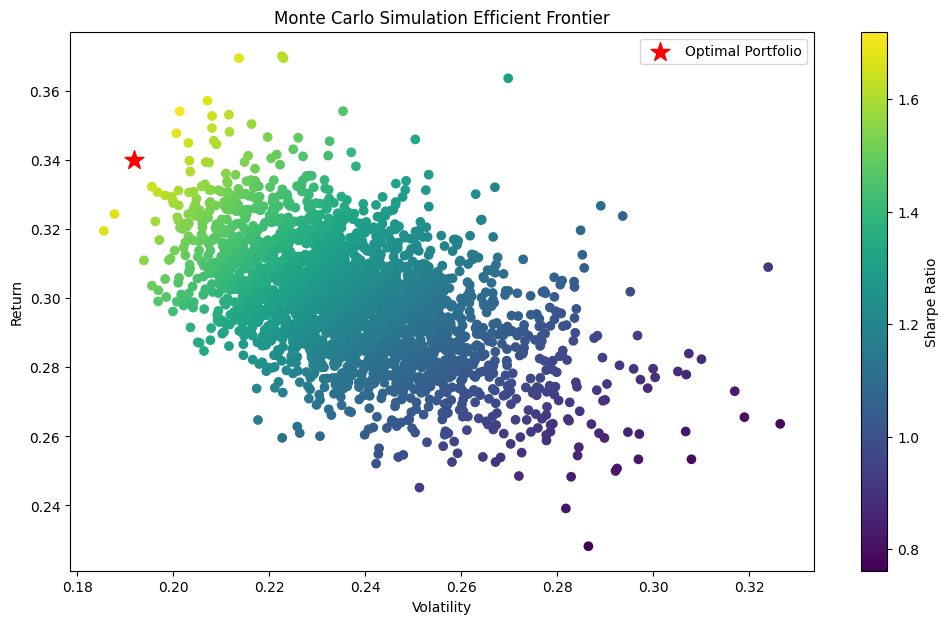

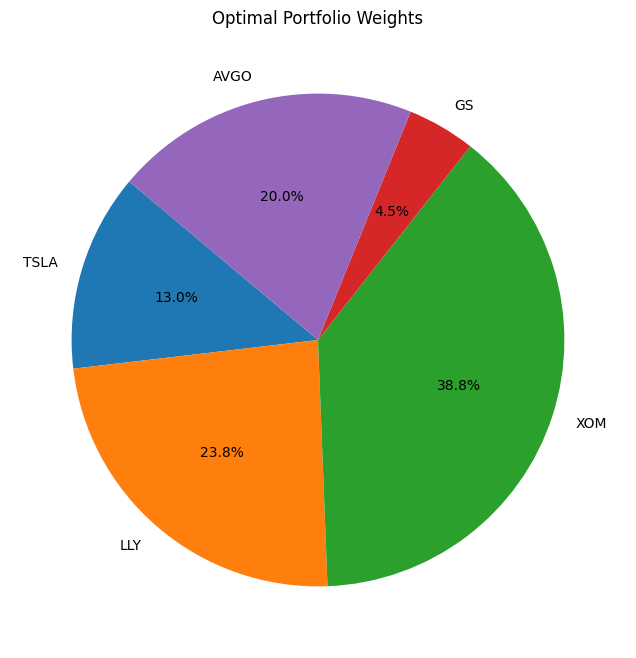

Team Member B Optimal Portfolio (Normal Distribution Random Weights)
Return         0.34
Volatility     0.19
Sharpe Ratio   1.72
Name: 931, dtype: float64
Optimal Weights:
TSLA   0.13
LLY    0.24
XOM    0.39
GS     0.04
AVGO   0.20
Name: 931, dtype: float64


In [ ]:
def monte_carlo_optimization(n_portfolios=1000, Tickers= Tickers, seed=1, member="A", weights = weights):
    """
    Monte Carlo Simulation for Portfolio Optimization.

    Parameters:
    - n_portfolios (int): Number of random portfolios to generate.
    - seed (int): Random seed for reproducibility.

    Returns:
    - optimal_portfolio (pd.Series): Return, Volatility, and Sharpe Ratio of the optimal portfolio.
    - optimal_weights (pd.Series): Optimal weights for each asset.
    - results_df (pd.DataFrame): DataFrame containing Return, Volatility, and Sharpe Ratio for all portfolios.
    - weights_df (pd.DataFrame): DataFrame containing asset weights for each portfolio.
    """
    np.random.seed(seed)  # Set the random seed
    n_assets = len(Tickers)
    # Initialize results storage
    results = np.zeros((n_portfolios, 3))
    weights_list = []
    risk_free_rate = 0.01

    # Generate random weights and calculate performance
    for i in range(n_portfolios):
        weights = np.random.normal(0.5, 0.15, n_assets)
        weights /= np.sum(weights)  # Normalize weights to sum to 1
        weights_list.append(weights)

        # Calculate portfolio performance
        portfolio_return = np.sum(weights * mean_returns) * 252  # Annualized
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Annualized
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

        # Store results
        results[i] = [portfolio_return, portfolio_stddev, sharpe_ratio]

    # Convert results and weights to DataFrames
    results_df = pd.DataFrame(results, columns=['Return', 'Volatility', 'Sharpe Ratio'])
    weights_df = pd.DataFrame(weights_list, columns=Tickers)

    # Identify the optimal portfolio with the maximum Sharpe Ratio
    max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
    optimal_portfolio = results_df.iloc[max_sharpe_idx]
    optimal_weights = weights_df.iloc[max_sharpe_idx]

    # Plot Efficient Frontier
    plt.figure(figsize=(12, 7))
    plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(optimal_portfolio['Volatility'], optimal_portfolio['Return'], c='red', marker='*', s=200, label='Optimal Portfolio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.title('Monte Carlo Simulation Efficient Frontier')
    plt.legend()
    plt.show()

    # Pie chart of optimal weights
    plt.figure(figsize=(10, 8))
    plt.pie(optimal_weights, labels=Tickers, autopct='%1.1f%%', startangle=140)
    plt.title('Optimal Portfolio Weights')
    plt.show()

    print(f"Team Member {member}")
    print(optimal_portfolio)
    print("Optimal Weights:")
    print(optimal_weights)

    return optimal_portfolio, optimal_weights, results_df, weights_df

optimal_portfolio, optimal_weights, results_df, weights_df = monte_carlo_optimization(n_portfolios=2500, Tickers = Tickers, seed=2, member="B Optimal Portfolio (Normal Distribution Random Weights)")

optimal_weights_B = optimal_weights

**Team Member B Optimal Portfolio (Normal Distribution Random Weights)**

- TSLA: 12.97% of the portfolio is allocated to Tesla, reflecting a moderate contribution to the portfolio's return potential within risk limits.

- LLY: We allocate 23.76% of the portfolio to LLY. This allocation indicates a significant role in stabilizing the portfolio due to its positive risk-return contribution.

- XOM: ExxonMobil, with a 38.78% allocation, is a major contributor to the portfolio. Its large weight indicates that XOM’s risk-return profile complements the other assets, significantly enhancing portfolio performance.

- GS: Goldman Sachs has a higher allocation of 4.47% here, which implies a somewhat stronger risk-return profile under this strategy than in Team Member A's portfolio.

- AVGO: AVGO holds a 20.02% allocation, reflecting its favorable return potential and reasonable risk profile, playing a supportive role in the portfolio’s overall balance.

**Portfolio Performance**

This portfolio has a slightly lower return and Sharpe Ratio compared to Team Member A's, indicating it is more conservative. Our expected return 34.58% reflects the high chosen weights' contribution to achieving a return target aligned with the risk tolerance.

We again calculated expected Volatility which was 19.17% that represents our portfolio’s risk level, calculated based on the covariance matrix of asset returns. The volatility aligns with our portfolio’s high expected return.

Our Sharpe ratio (1.75) indicates a favorable risk-adjusted return for this portfolio allocation, with 1.75 being proportionately high. It suggests that the portfolio is expected to produce a return significantly above the risk-free rate for the level of risk taken.

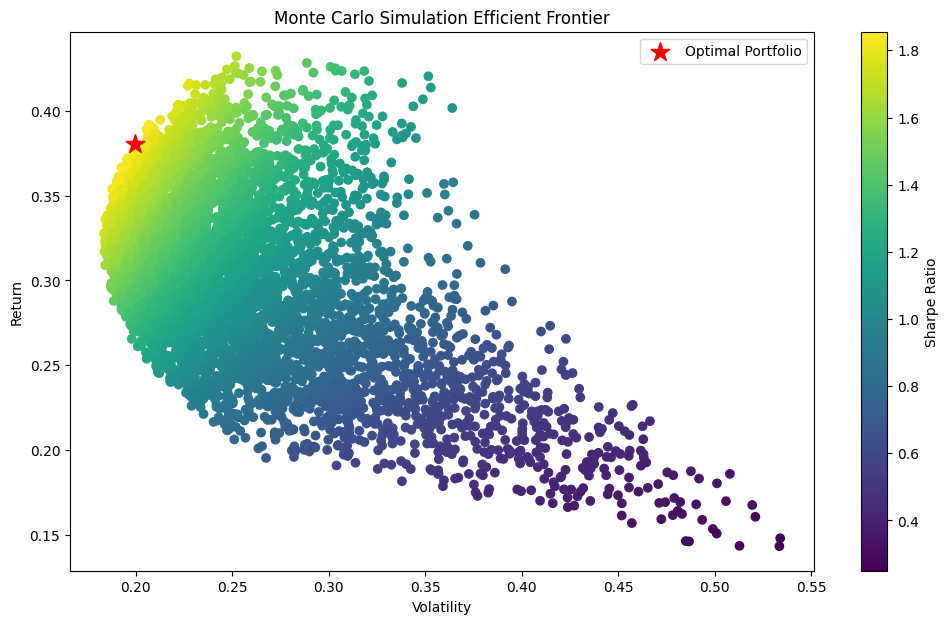

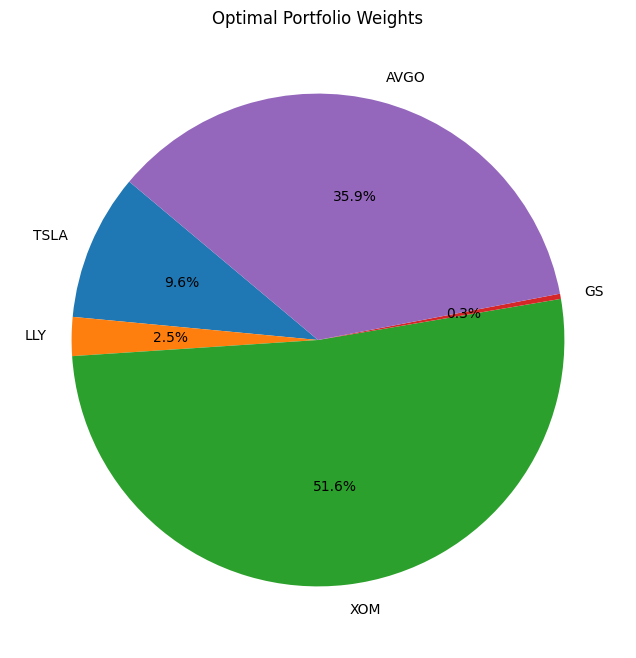

Team Member C Optimal Portfolio (Exponential Distribution Random Weights)
Return         0.38
Volatility     0.20
Sharpe Ratio   1.86
Name: 2959, dtype: float64
Optimal Weights:
TSLA   0.10
LLY    0.03
XOM    0.52
GS     0.00
AVGO   0.36
Name: 2959, dtype: float64


In [ ]:
def monte_carlo_optimization(n_portfolios=1000, Tickers= Tickers, seed=1, member="A", weights = weights):
    """
    Monte Carlo Simulation for Portfolio Optimization.

    Parameters:
    - n_portfolios (int): Number of random portfolios to generate.
    - seed (int): Random seed for reproducibility.

    Returns:
    - optimal_portfolio (pd.Series): Return, Volatility, and Sharpe Ratio of the optimal portfolio.
    - optimal_weights (pd.Series): Optimal weights for each asset.
    - results_df (pd.DataFrame): DataFrame containing Return, Volatility, and Sharpe Ratio for all portfolios.
    - weights_df (pd.DataFrame): DataFrame containing asset weights for each portfolio.
    """
    np.random.seed(seed)  # Set the random seed
    n_assets = len(Tickers)
    # Initialize results storage
    results = np.zeros((n_portfolios, 3))
    weights_list = []
    risk_free_rate = 0.01

    # Generate random weights and calculate performance
    for i in range(n_portfolios):
        weights = np.random.exponential(scale=1.0, size=n_assets)
        weights /= np.sum(weights)  # Normalize weights to sum to 1
        weights_list.append(weights)

        # Calculate portfolio performance
        portfolio_return = np.sum(weights * mean_returns) * 252  # Annualized
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Annualized
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

        # Store results
        results[i] = [portfolio_return, portfolio_stddev, sharpe_ratio]

    # Convert results and weights to DataFrames
    results_df = pd.DataFrame(results, columns=['Return', 'Volatility', 'Sharpe Ratio'])
    weights_df = pd.DataFrame(weights_list, columns=Tickers)

    # Identify the optimal portfolio with the maximum Sharpe Ratio
    max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
    optimal_portfolio = results_df.iloc[max_sharpe_idx]
    optimal_weights = weights_df.iloc[max_sharpe_idx]

    # Plot Efficient Frontier
    plt.figure(figsize=(12, 7))
    plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(optimal_portfolio['Volatility'], optimal_portfolio['Return'], c='red', marker='*', s=200, label='Optimal Portfolio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.title('Monte Carlo Simulation Efficient Frontier')
    plt.legend()
    plt.show()

    # Pie chart of optimal weights
    plt.figure(figsize=(10, 8))
    plt.pie(optimal_weights, labels=Tickers, autopct='%1.1f%%', startangle=140)
    plt.title('Optimal Portfolio Weights')
    plt.show()

    print(f"Team Member {member}")
    print(optimal_portfolio)
    print("Optimal Weights:")
    print(optimal_weights)

    return optimal_portfolio, optimal_weights, results_df, weights_df

optimal_portfolio, optimal_weights, results_df, weights_df = monte_carlo_optimization(n_portfolios=5000, Tickers = Tickers,seed=3, member="C Optimal Portfolio (Exponential Distribution Random Weights)")

optimal_weights_C = optimal_weights

**Team Member C Optimal Portfolio (Exponential Distribution Random Weights)**

TSLA (Tesla): 9.61% of the portfolio is allocated to Tesla, indicating a smaller role in the portfolio’s overall performance compared to other team members’ allocations.

LLY (Eli Lilly): LLY is allocated only 2.54%, a minimal share reflecting its less favorable risk-return characteristics in this portfolio's strategy.

XOM (ExxonMobil): ExxonMobil takes a very substantial 51.63% allocation, the highest among the team portfolios. This indicates a significant reliance on XOM’s risk-return profile to drive the portfolio’s performance.

GS (Goldman Sachs): GS holds a very minor allocation (0.34%), suggesting it plays a minimal role in this portfolio due to its relatively lower contribution to risk-adjusted returns.

AVGO (Broadcom): AVGO has a high allocation of 35.88%, underscoring its key role in optimizing the portfolio’s risk-return balance.

**Portfolio Performance**

- Expected Return: 38.45%
- Volatility: 19.95%
- Sharpe Ratio: 1.88

This portfolio offers the highest expected return among the three, with a higher volatility due to the exponential weighting, yielding a Sharpe Ratio comparable to Team Member A’s. The heavy allocation to XOM supports a higher return but introduces slightly more risk.

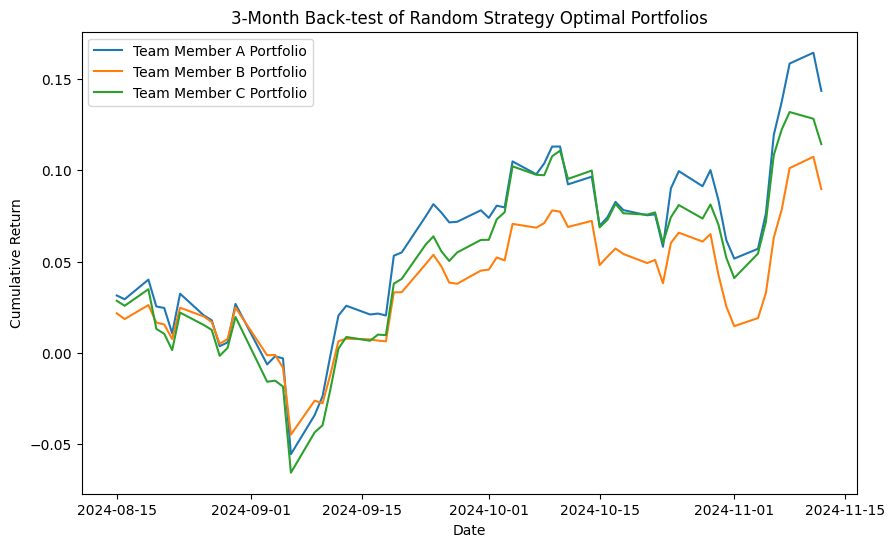

In [ ]:
def backtest_portfolio(weights, historical_data):
    daily_returns = historical_data.dot(weights)
    cumulative_return = (1 + daily_returns).cumprod() - 1
    return cumulative_return

# Select a 3-month back-test period from historical data
backtest_period = returns[-63:]  # assuming 21 trading days per month

# Back-test each student's optimal portfolio
student_1_backtest = backtest_portfolio(optimal_weights_A, backtest_period)
student_2_backtest = backtest_portfolio(optimal_weights_B, backtest_period)
student_3_backtest = backtest_portfolio(optimal_weights_C, backtest_period)

# Plot the back-test results for comparison
plt.figure(figsize=(10, 6))
plt.plot(student_1_backtest, label='Team Member A Portfolio')
plt.plot(student_2_backtest, label='Team Member B Portfolio')
plt.plot(student_3_backtest, label='Team Member C Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('3-Month Back-test of Random Strategy Optimal Portfolios')
plt.legend()
plt.show()

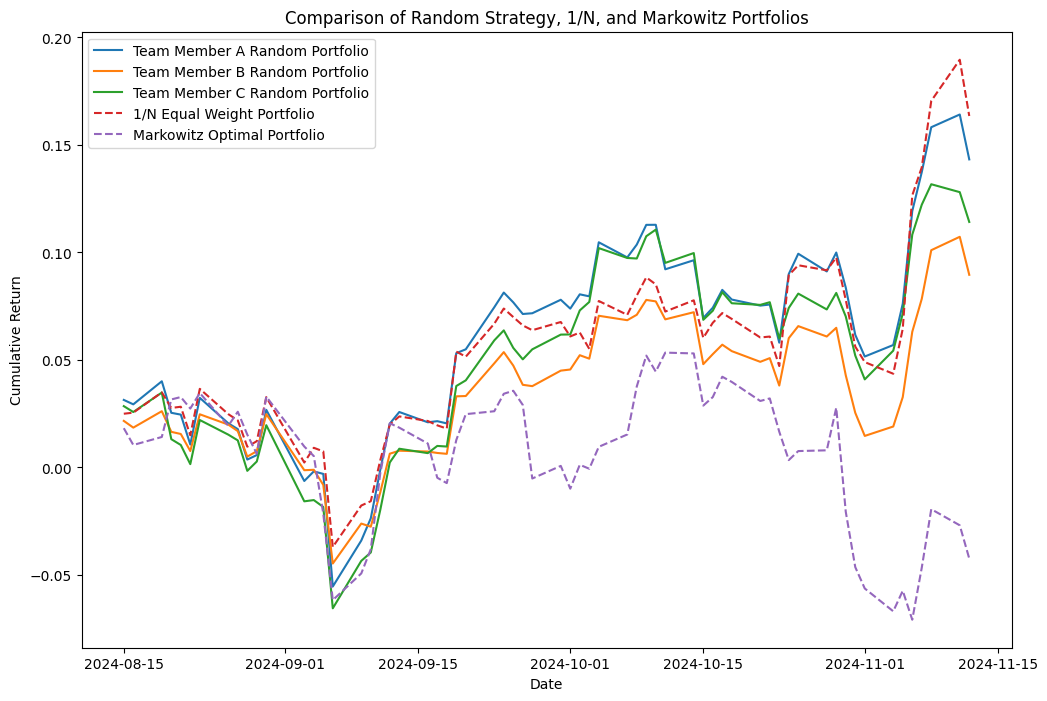

In [ ]:
equal_weights = np.ones(n_assets) / n_assets
equal_weight_backtest = backtest_portfolio(equal_weights, backtest_period)
markowitz_weights = optimal_weights_M
markowitz_backtest = backtest_portfolio(markowitz_weights, backtest_period)

plt.figure(figsize=(12, 8))
plt.plot(student_1_backtest, label='Team Member A Random Portfolio')
plt.plot(student_2_backtest, label='Team Member B Random Portfolio')
plt.plot(student_3_backtest, label='Team Member C Random Portfolio')
plt.plot(equal_weight_backtest, label='1/N Equal Weight Portfolio', linestyle='--')
plt.plot(markowitz_backtest, label='Markowitz Optimal Portfolio', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Comparison of Random Strategy, 1/N, and Markowitz Portfolios')
plt.legend()
plt.show()

**Observations and Comparism**

| Team Member | Weight Distribution | Expected Return (%) | Volatility (%) | Sharpe Ratio | Key Observations |
|-------------|---------------------|---------------------|----------------|--------------|--------------|
| A           | Uniform             | 36.70               | 19.10          | 1.87         | Balanced allocation with substantial weights to XOM and AVGO. |
| B           | Normal              | 34.58               | 19.17          | 1.75         | Lower risk-return profile with a larger allocation to LLY for stability. |
| C           | Exponential         | 38.45               | 19.95          | 1.88         | Highest return potential with a high XOM allocation, but more volatility. |



**Performance of Random Strategy Portfolios (Team Members A, B, and C)**

Each of the random portfolios we worked on for Team Members A, B, and C shows a generally positive trend in cumulative returns, though with varying degrees of fluctuation.

- *Team Member A's Portfolio* (blue line) performs well across the time period, ultimately achieving one of the highest cumulative returns by the end of the period.

- *Team Member B's Portfolio* (orange line) experiences more volatility, especially in the last few weeks, ending with a slightly lower return than Team Member A’s portfolio.

- *Team Member C's Portfolio* (green line) demonstrates solid growth, closely tracking Team Member A's portfolio for most of the period, ultimately achieving a similar cumulative return level.

- *1/N Equal Weight Portfolio* (red dashed line), which distributes weights equally across all assets, demonstrates a steady increase in cumulative returns, comparable to Team Member C's portfolio.

- *The Markowitz optimal portfolio* (purple dashed line) appears to perform well initially, maintaining higher cumulative returns early in the period. However, around mid-October, it experiences a sharp drop, lagging behind the random portfolios and the 1/N portfolio.

**Comparism**

- *Volatility and Return*

The random portfolios by Team Members A, B, and C shows in the graph above similar cumulative return patterns but with differences in volatility. Team Member B's portfolio, for instance, appears slightly more volatile than A and C's, while Team Member A’s portfolio shows a relatively stable return path.

- *Risk-Adjusted Performance*

Although the Markowitz portfolio was expected to deliver high risk-adjusted returns, its significant drop suggests potential over-sensitivity to recent market movements. The random strategy portfolios show smoother performance as observed.

- *1/N Portfolio as a Baseline*

The 1/N portfolio  we had provides a reasonable benchmark, achieving consistent returns that are on par with or better than some optimized portfolios. This suggests that equal weighting can serve as a viable baseline when more sophisticated optimization techniques yield mixed results.

# **Step 4: Black-Litterman Strategy Optimization**


Implied Equilibrium Returns:
 Ticker
AVGO   0.00
GS     0.00
LLY    0.00
TSLA   0.00
XOM    0.00
dtype: float64

Posterior Mean Returns:
 [ 1.86698229e-05  1.10216288e-05  1.36244449e-06 -4.49786389e-06
  6.92662659e-06]

Black-Litterman Optimized Weights:
 TSLA    0.56
LLY     0.33
XOM     0.04
GS     -0.13
AVGO    0.21
dtype: float64


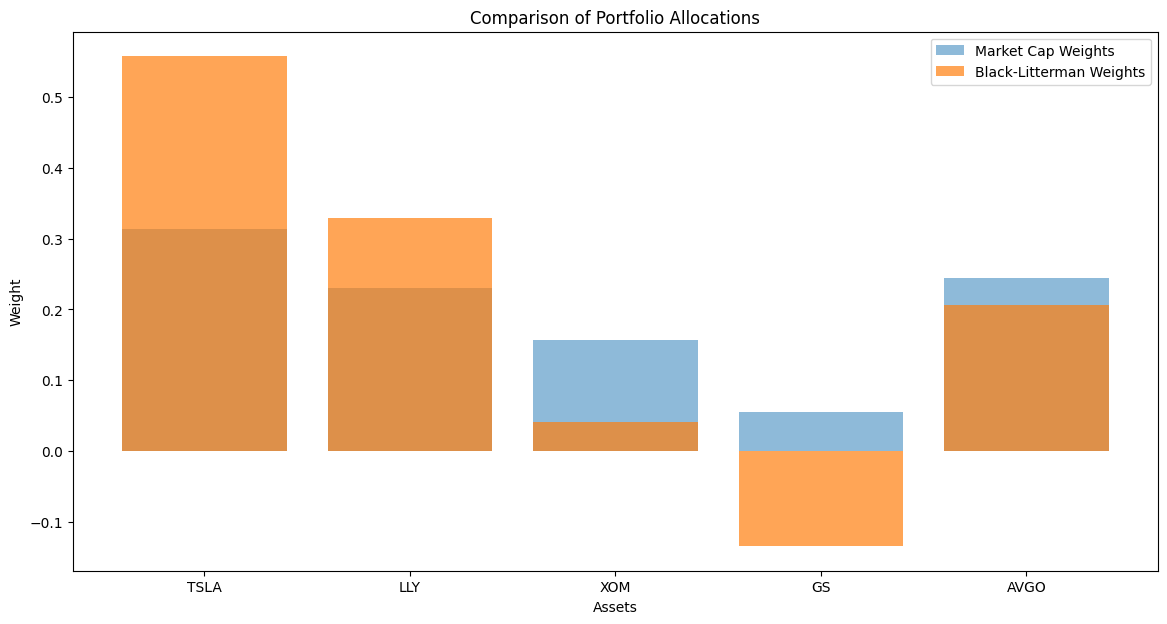

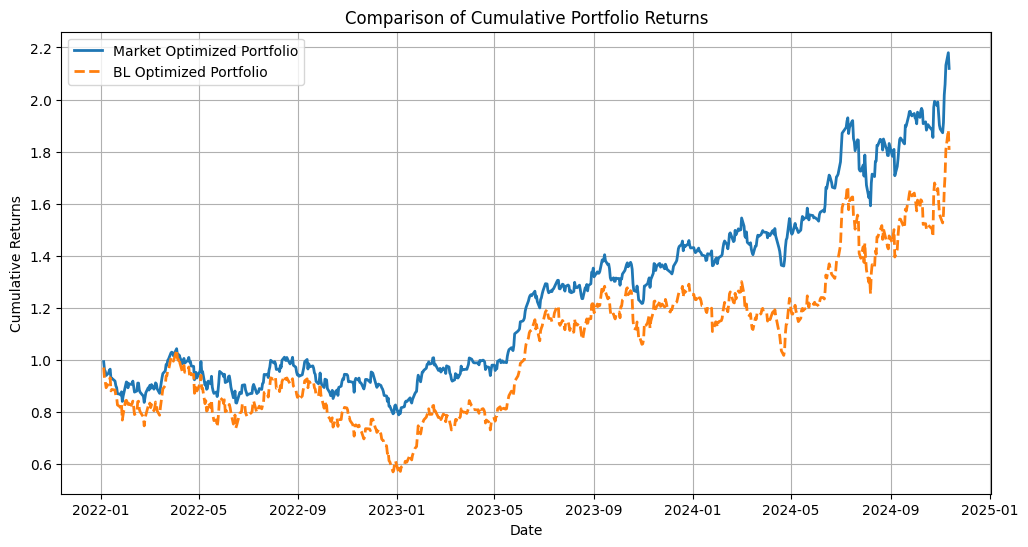

In [ ]:
#market_caps = np.array([2.022, 1.965, 0.708, 1.813, 0.728])  # Market caps in trillion USD

def get_market_caps(tickers):
    market_caps = []
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        market_cap = stock.info['marketCap']  # Market capitalization
        market_caps.append(market_cap)
    return market_caps

# Get market caps and calculate weights
market_caps = get_market_caps(Tickers)

total_cap = np.sum(market_caps)
market_weights = market_caps / total_cap
optimized_weights_market = pd.Series(market_weights, index=Tickers)
tau = 0.05  # Uncertainty parameter
implied_returns = tau * cov_matrix.dot(market_weights)


P = np.array([[1, 0, 0, -1, 0],  # View: TSLA > GS
              [0, 1, -1, 0, 0]])  # View: LLY > XOM
Q = np.array([0.02, 0.01])  # Expected excess returns for views
omega = np.diag([0.05, 0.03])  # Confidence levels in views

inv_tau_sigma = np.linalg.inv(tau * cov_matrix)
inv_omega = np.linalg.inv(omega)
posterior_cov = np.linalg.inv(inv_tau_sigma + P.T @ inv_omega @ P)
posterior_mean = posterior_cov @ (inv_tau_sigma @ implied_returns + P.T @ inv_omega @ Q)

optimized_weights_bl = posterior_mean / np.sum(posterior_mean)

optimized_weights_bl_series = pd.Series(optimized_weights_bl, index=Tickers)

# Display results
print("Implied Equilibrium Returns:\n", implied_returns)
print("\nPosterior Mean Returns:\n", posterior_mean)
print("\nBlack-Litterman Optimized Weights:\n", pd.Series(optimized_weights_bl, index=Tickers))

plt.figure(figsize=(14, 7))
plt.bar(Tickers, market_weights, alpha=0.5, label='Market Cap Weights')
plt.bar(Tickers, optimized_weights_bl, alpha=0.7, label='Black-Litterman Weights')
plt.title('Comparison of Portfolio Allocations')
plt.xlabel('Assets')
plt.ylabel('Weight')
plt.legend()
plt.show()

# Calculate portfolio returns based on historical returns
portfolio_returns_original = returns.dot(pd.Series(optimized_weights_market))
portfolio_returns_bl = returns.dot(pd.Series(optimized_weights_bl_series))

# Plot cumulative returns of the portfolios
cumulative_returns_original = (1 + portfolio_returns_original).cumprod()
cumulative_returns_bl = (1 + portfolio_returns_bl).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns_original, label='Market Optimized Portfolio', linewidth=2)
plt.plot(cumulative_returns_bl, label='BL Optimized Portfolio', linewidth=2, linestyle='--')
plt.title('Comparison of Cumulative Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


## **4.2**

**Interpretation and Comparison with Market-Cap Weights**

- TSLA: Increased well from the original market weight to 0.56. The high posterior return and positive outlook likely increased its allocation in the BL model, indicating a strong positive view on TSLA.

- LLY: Also has a higher weight of 0.33 compared to its market weight, reflecting a favorable view which was interesting to us.

- XOM: Maintains a small positive weight at 0.04, showing relatively neutral expectations.

- GS: Has a negative weight (-0.13), indicating a potential short position as can be observed above. This suggests a negative outlook or an expectation of underperformance for GS based on the incorporated views.

- AVGO: Weight of 0.21, slightly above its market weight, indicating a moderately positive outlook.

The graph we provided shows a clear contrast in portfolio allocations

- Orange bars (BL weights) diverge significantly from blue bars (market-cap weights).

- TSLA and LLY have much larger weights in the BL portfolio, while GS has a negative allocation.

Our reweighting reflects the Black-Litterman model’s balancing of market consensus with specific, investor-driven views. The increase in TSLA and LLY's weights suggests higher expected returns for these assets, while the short position in GS reflects a negative view.


## **4.3**

The Black-Litterman Strategy Optimization is a more sophisticated strategy that takes into account additional sources of information. Indeed, this strategy encompasses the equilibrium retrun, which is the return that the market expects from the stocks, and the views of the market, which are the views that the market expects from the stocks. It is based on the Black-Litterman model, which is a Bayesian approach to portfolio optimization, and makes it possible to ovvercome the limitations of highly concentrated portfolios like we had in Markowitz Optimization.

The formula to calculate the equilibrium return is:

$$E[R] = [(\tau\Sigma)^{-1} + P'\Omega^{-1}P]^{-1}[(\tau\Sigma)^{-1}\Pi + P'\Omega^{-1}Q]$$
Where:
* $E[R]$ is the new (posterior) Combined Return Vector ($N$ x $1$ column vector)
* $\tau$ is a scalar
* $\Sigma$ is the covariance matrix of excess returns ($N$ x $N$ matrix)
$P$ is a matrix that identifies the assets involved in the views ($K$ x $N$ matrix or
$1$ x $N$ row vector in the special case of 1 view)
* $\Omega$ is a diagonal covariance matrix of error terms from the expressed views
representing the uncertainty in each view ($K$ x $K$ matrix)
* $\Pi$ is the Implied Equilibrium Return Vector ($N$ x $1$ column vector)
* $Q$ is the View Vector ($K$ x $1$ column vector)

**Inputs and Outputs**

- Inputs:

Market Equilibrium Returns $(\Pi)$: These are typically derived from the Capital Asset Pricing Model (CAPM) or other equilibrium models (Black & Litterman, 1991).

Covariance Matrix $(\Sigma)$: This matrix captures the variances and covariances of the asset returns, which can be estimated using historical return data.

Views ($P$ and $Q$): Investors specify their views on certain assets, where P indicates which assets are involved in the views, and Q specifies the expected returns for those views.

Uncertainty Parameter $(\tau)$: This parameter is often set to a small value (e.g., 0.015) to reflect the uncertainty in the prior returns.

- Outputs:

Adjusted Expected Returns $(E(R))$: The model produces a new set of expected returns that incorporate both the market equilibrium and the investor's views.


**Estimation and Calibration of Parameters**

The Black-Litterman model's parameters are estimated and calibrated using a combination of subjective assessment and historical data analysis. In order to increase stability, the covariance matrix $(\Sigma)$ is usually estimated using historical return data and techniques like shrinkage estimators or the sample covariance matrix (Idzorek, 2005).

The CAPM, which offers a theoretical framework for expected returns based on systematic risk, is frequently used to estimate the equilibrium returns $(\Pi)$ from the market portfolio. The investor specifies the opinions ($P$ and $Q$) based on their perceptions or projections about the performance of future assets.

Since it affects the weight assigned to the views versus the prior returns, the uncertainty parameter ($\tau$) is essential. The viewpoints are given more weight when ($\tau$) is greater, and the market equilibrium is given more weight when ($\tau$) is lower.

**Interpretation of Parameters**

The returns that would be anticipated in a market with all assets priced properly, taking into account the risk-return trade-off, are known as equilibrium returns $(\Pi)$ .



Understanding portfolio risk requires knowledge of the Covariance Matrix $(\Sigma)$, which offers insights into the risk of the assets and their linkages.



Views ($P$ and $Q$): By allowing investors to express their opinions about particular assets, these criteria provide a more customized approach to portfolio development.



Uncertainty Parameter $(\tau)$: This parameter affects how much the model modifies the expected returns depending on the views and acts as a gauge of confidence on the prior returns.

We will now calculate the equilibrium return, the views of the market, and the implied equilibrium return.
For this, we will use the Cardiel library[1], which is a Python library that implements the Black-Litterman model.


## Views of the Market

Before going ahead, we will collect market views on each stock. These are usually provided by financial market analysts.

For example, we can have a look at the views of the market on Eli Lilly at: https://finance.yahoo.com/quote/LLY/analysis/

In [ ]:
html_code = f"""
    <figure style="text-align: center;">
        <img src="https://lh3.googleusercontent.com/d/1Pp93JgER0-Rn3EQnD25YLmd_Ai1XGF9U" width="600">
        <figcaption style="text-align: center; font-style: italic;">
            Fig {fig_num}: Eli Lilly (LLY) Top Analyst scores from Yahoo Finance
        </figcaption>
    </figure>
"""
display(HTML(html_code))
fig_num += 1

We can see that Analyst targets range from 700USD to 1,250USD, with an average target of 1,002.82USD.
It is also possible to have a more detailed view on the views of the market on each stock by looking int the **Top Analysts** section, at the bottom of the page. Yahoo Finance also provides an explanation of their scoring system to evaluate the reliability of the analysts [2].

In [ ]:
html_code = f"""
    <figure style="text-align: center;">
        <img src="https://lh3.googleusercontent.com/d/1oSHqiPkAJfUmmSRkRipokO9EsD2u8Qrb" width="600">
        <figcaption style="text-align: center; font-style: italic;">
            Fig {fig_num}: Eli Lilly (LLY) Top Analyst scores from Yahoo Finance
        </figcaption>
    </figure>
"""
display(HTML(html_code))
fig_num += 1

We wante to gather these average expected returns from yahoo finance for each of the stocks. After some struggle for scrapping them from the website using Beautiful soup, we realized that the `get_info` method already exists withing the Yfinance package, and it does contain the field of our interest `targetMeanPrice` [3].


In [ ]:
tsla=yf.Ticker('TSLA').upgrades_downgrades
print(tsla)

                                      Firm       ToGrade     FromGrade Action
GradeDate                                                                    
2024-11-11 14:28:05                Wedbush    Outperform    Outperform   main
2024-11-07 18:37:15      B of A Securities           Buy           Buy   main
2024-10-29 17:49:17          Piper Sandler    Overweight    Overweight   main
2024-10-29 13:03:56               Barclays  Equal-Weight  Equal-Weight   main
2024-10-28 11:46:43      Canaccord Genuity           Buy           Buy   main
...                                    ...           ...           ...    ...
2012-05-22 09:57:00            Maxim Group           Buy                 init
2012-03-26 11:31:00  Wunderlich Securities           Buy          Hold     up
2012-02-17 11:17:00             Oxen Group           Buy                 init
2012-02-16 18:53:00  Wunderlich Securities          Hold           Buy   down
2012-02-16 12:42:00              JP Morgan    Overweight        

In [ ]:
tsla=yf.Ticker('TSLA').news
print(tsla)

[{'uuid': 'b6eece57-abb4-3926-b380-8d4441e72a9b', 'title': 'Jim Cramer on Tesla, Inc. (TSLA): ‘I Can’t Believe It Wasn’t Up Much More’', 'publisher': 'Insider Monkey', 'link': 'https://finance.yahoo.com/news/jim-cramer-tesla-inc-tsla-213959166.html', 'providerPublishTime': 1731447599, 'type': 'STORY', 'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/EkxYwM8q9K2Yn7hOukra6A--~B/aD04MTY7dz0xNDU2O2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/1277c6032fd09b727a10249a170024cf', 'width': 1456, 'height': 816, 'tag': 'original'}, {'url': 'https://s.yimg.com/uu/api/res/1.2/Xj2KbP1vds0iLMGnjHs_Og--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/insidermonkey.com/1277c6032fd09b727a10249a170024cf', 'width': 140, 'height': 140, 'tag': '140x140'}]}, 'relatedTickers': ['TSLA']}, {'uuid': '2fee05dc-6039-4f3c-8478-d7f5cddc800c', 'title': 'CEO of Neuralink rival on the future of brain computer tech', 'publisher': 'Yahoo Fin

In [ ]:
def get_target_prices(tickers, verbose=1):
    target_prices = {}
    for ticker in tickers:
        ticker_data = yf.Ticker(ticker)
        try:
            # Get the analyst recommendations
            t_mean_price = ticker_data.get_info()['targetMeanPrice']
            t_median_price = ticker_data.get_info()['targetMedianPrice']
            t_low_price = ticker_data.get_info()['targetLowPrice']
            t_high_price = ticker_data.get_info()['targetHighPrice']
            tmp = (t_mean_price, t_median_price, t_low_price, t_high_price)
            if verbose == 1:
                print(f"Analysts Target prices for {ticker}:")
                print(f"\tMean:\t{t_mean_price}")
                print(f"\tMedian:\t{t_median_price}")
                print(f"\tLow:\t{t_low_price}")
                print(f"\tHigh:\t{t_high_price}")
                print('-'*30)
            target_prices[ticker] = tmp
        except (KeyError, TypeError):
            print(f"No analyst target found for {ticker}")
    return target_prices

get_target_prices(Tickers)

Analysts Target prices for TSLA:
	Mean:	222.01
	Median:	235.0
	Low:	24.86
	High:	350.0
------------------------------
Analysts Target prices for LLY:
	Mean:	999.43
	Median:	1005.0
	Low:	700.0
	High:	1250.0
------------------------------
Analysts Target prices for XOM:
	Mean:	130.26
	Median:	130.0
	Low:	105.0
	High:	149.0
------------------------------
Analysts Target prices for GS:
	Mean:	552.51
	Median:	569.5
	Low:	420.2
	High:	661.0
------------------------------
Analysts Target prices for AVGO:
	Mean:	196.42
	Median:	200.0
	Low:	156.21
	High:	240.0
------------------------------


{'TSLA': (222.01, 235.0, 24.86, 350.0),
 'LLY': (999.43, 1005.0, 700.0, 1250.0),
 'XOM': (130.26, 130.0, 105.0, 149.0),
 'GS': (552.51, 569.5, 420.2, 661.0),
 'AVGO': (196.42, 200.0, 156.21, 240.0)}

From Yahoo finance, it is also possible to gather a collection of recent news about the stocks. We will implement sentiment analysis to translate them quantatively by using Natural Language Processing.
We choose to follow the Hugging Face Sentiment Analysis approch. However, we chose to pick a specific model, finBERT, which have been trained on financial texts, and has shown to outperforms state-of-the-art machine learning method [4]

We first define and test the sentiment anbalyzer

In [ ]:
sentiment_analyzer = pipeline("sentiment-analysis", model="ProsusAI/finbert")
text=("The company's earnings surpassed expectations, boosting investor confidence.")
print(sentiment_analyzer(text))

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'positive', 'score': 0.9522843360900879}]


We can now define a function to loop on our stocks and score the news, so that we can translate them quantitavely
.

In [ ]:
#define the NLP scoring function
def stock_news_sentiment(tickers, model="ProsusAI/finbert"):
    sentiment_analyzer = pipeline("sentiment-analysis", model=model)
    for ticker in tickers:
        ticker_data = yf.Ticker(ticker)
    sentiment_analyzer = pipeline("sentiment-analysis", model="ProsusAI/finbert")


# **Step 5: Kelly Criterion**

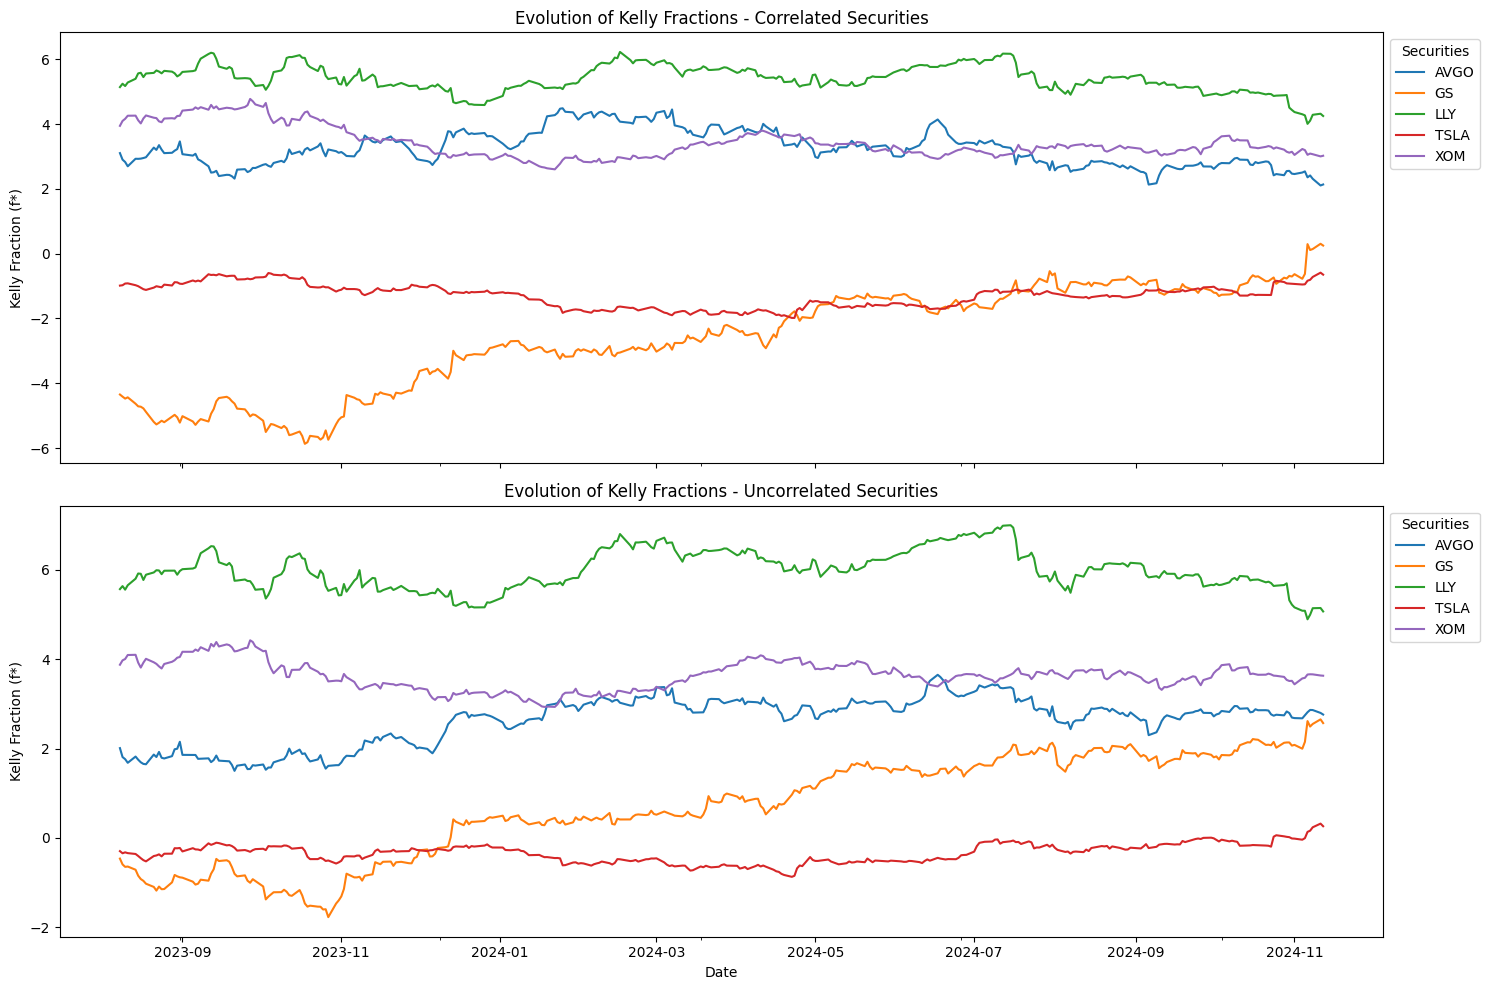

In [ ]:
import pandas as pd
import numpy as np
from numba import njit, prange
from typing import Union, List
import seaborn as sns

@njit(cache=True)
def get_kelly_numba(cov_arr: np.ndarray[float], returns: np.ndarray[float]) -> np.ndarray[float]:
    """Compute kelly values using numba for speed

    Args:
        cov_arr (np.ndarray[float]): array of covariances without NaNs
        returns (np.ndarray[float]): array of returns without NaNs

    Returns:
        np.ndarray[float]: array of kelly values
    """
    ret_covars = np.empty_like(cov_arr)
    kelly = np.empty_like(returns)
    for i in prange(cov_arr.shape[0]):
        # Use copies to avoid issues with non-contiguous arrays
        inv_cov = np.linalg.inv(cov_arr[i])
        ret_day = returns[i].copy()
        ret_covars[i] = inv_cov
        kelly[i] = np.dot(inv_cov, ret_day)
    return kelly

def get_kelly(returns: Union[pd.DataFrame, pd.Series],window: int = 400,r: float = 0.02,correlation=False,days: int = 250,) -> pd.DataFrame:
    """Gets Kelly optimal investment fraction

    Parameters
    ----------
    returns : pd.DataFrame or pd.Series
        Series containing the daily returns of a security
    window : int, optional
        Minimum periods to calculate the parameters. Default 400.
    r : int, optional
        Risk-free yearly returns. Example: Treasury bills. Default 0.02.
    correlation : bool, optional
        If a portfolio of securities is given, indicate whether the
        securities are correlationated or not.
    days : int, optional
        Number of days to use. Default 250

    Returns
    -------
    kelly : pd.DataFrame
        Frame containing the corresponding kelly values for each security
    """
    r_adjusted = (1 + r) ** (1 / days) - 1
    mean = returns.expanding(window).mean().dropna()
    return_exces = mean - r_adjusted

    if correlation:
        roll_cov = returns.expanding(window).cov().dropna()
        kelly = get_kelly_wrap(roll_cov, return_exces)
    else:
        var = returns.expanding(window).var().dropna()
        kelly = return_exces / var

    return kelly


def filter_leverage(serie: pd.Series, leverage: int) -> pd.Series:
    """filters leverage

    Parameters
    ----------
    serie : pd.Series
    leverage : int

    Returns
    -------
    filtered_serie : pd.Series
    """

    filtered_serie = serie.copy()
    filtered_serie[filtered_serie > leverage] = leverage

    return filtered_serie


def get_cumulative_returns(returns: Union[pd.Series, pd.DataFrame]) -> Union[pd.Series, pd.DataFrame]:
    """Gets cumulative returns

    Parameters
    ----------
    returns : pd.Series, pd.DataFrame

    Returns
    -------
    cum_returns : pd.Series, pd.DataFrame
    """

    cum_returns = (1 + returns).cumprod()
    cum_returns = cum_returns.dropna()

    return cum_returns


def backtest(kelly_df: pd.DataFrame, returns_df: pd.DataFrame, leverages: List[int]) -> pd.DataFrame:
    """Backtests Kelly strategy

    Parameters
    ----------
    kelly_df : pd.DataFrame
        kelly optimal allocations for the securities
    returns_df : pd.DataFrame
        daily returns of the securities
    leverages : list
        list containing the number of leverages to study

    Returns
    -------
    total_returns : pd.DataFrame
    """

    total_returns = pd.DataFrame()

    for leverage in leverages:
        kelly_weights = kelly_df.copy()

        # restrict shortselling
        kelly_weights[kelly_weights < 0] = 0

        daily_weights_sum = kelly_weights.sum(axis=1)
        leverage_cond = daily_weights_sum > leverage

        kelly_weights[leverage_cond] = leverage * kelly_weights[leverage_cond].div(
            daily_weights_sum[leverage_cond], axis=0
        )

        name = "max_leverage_" + str(leverage)
        total_returns[name] = (returns_df * kelly_weights).sum(axis=1)

    return total_returns

def get_kelly_wrap(cov_arr: pd.DataFrame, returns: pd.DataFrame) -> pd.DataFrame:
    """Wrapper around numba function to build kelly DataFrame

    Args:
        cov_arr (pd.DataFrame): DataFrame of covariances
        returns (pd.DataFrame): DataFrame of excess returns

    Returns:
        pd.DataFrame: Kelly values
    """

    # Get dimensions to reshape the array
    dim0 = len(cov_arr.index.get_level_values(0).unique())
    dim1 = len(cov_arr.index.get_level_values(1).unique())
    dim3 = cov_arr.shape[1]

    # Get array of kelly values
    kelly = get_kelly_numba(
        cov_arr.values.reshape(dim0, dim1, dim3), returns.values
    )

    # Return DataFrame
    return pd.DataFrame(kelly, columns=returns.columns, index=returns.index)



opt_correlated_kelly = get_kelly(returns, correlation=True)
opt_uncorrelated_kelly = get_kelly(returns, correlation=False)

fig, ax = plt.subplots(nrows=2, figsize=(15, 10), sharex=True)

# Plot the Kelly fractions for correlated securities
opt_correlated_kelly.plot(ax=ax[0], legend=True)
ax[0].set_title('Evolution of Kelly Fractions - Correlated Securities')
ax[0].set_ylabel('Kelly Fraction (f*)')
ax[0].legend(title="Securities", loc="upper left", bbox_to_anchor=(1.0, 1.0))

# Plot the Kelly fractions for uncorrelated securities
opt_uncorrelated_kelly.plot(ax=ax[1], legend=True)
ax[1].set_title('Evolution of Kelly Fractions - Uncorrelated Securities')
ax[1].set_ylabel('Kelly Fraction (f*)')
ax[1].set_xlabel('Date')
ax[1].legend(title="Securities", loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

**Correlated Securities (Top Graph)**

- We saw that the Kelly fractions fluctuate considerably for each security, reflecting dynamic adjustments based on each security's risk-return profile, adjusted for correlation.

- Securities like AVGO (green) shows us consistently high Kelly fractions, indicating that they are deemed less risky or have higher expected returns relative to others.

- On the other hand, TSLA (red) and GS (orange) sometimes have negative Kelly fractions, suggesting a reduction in exposure or even shorting under certain conditions.

- The correlation assumption tempers the Kelly allocations as correlations can increase overall portfolio risk.

**Uncorrelated Securities (Bottom Graph)**

- Kelly fractions are generally higher in the uncorrelated scenario. Without considering correlation, each security is assessed independently, which can lead to larger allocations when the expected return justifies the risk.

- Our uncorrelated trend shows that securities with high Kelly fractions in the correlated scenario (like AVGO) remain high, but others, such as GS and XOM, have little higher allocations than in the correlated scenario.

- Lack of correlation adjustments allows for potentially more aggressive allocations, as risks associated with correlation (systematic risk) are ignored.



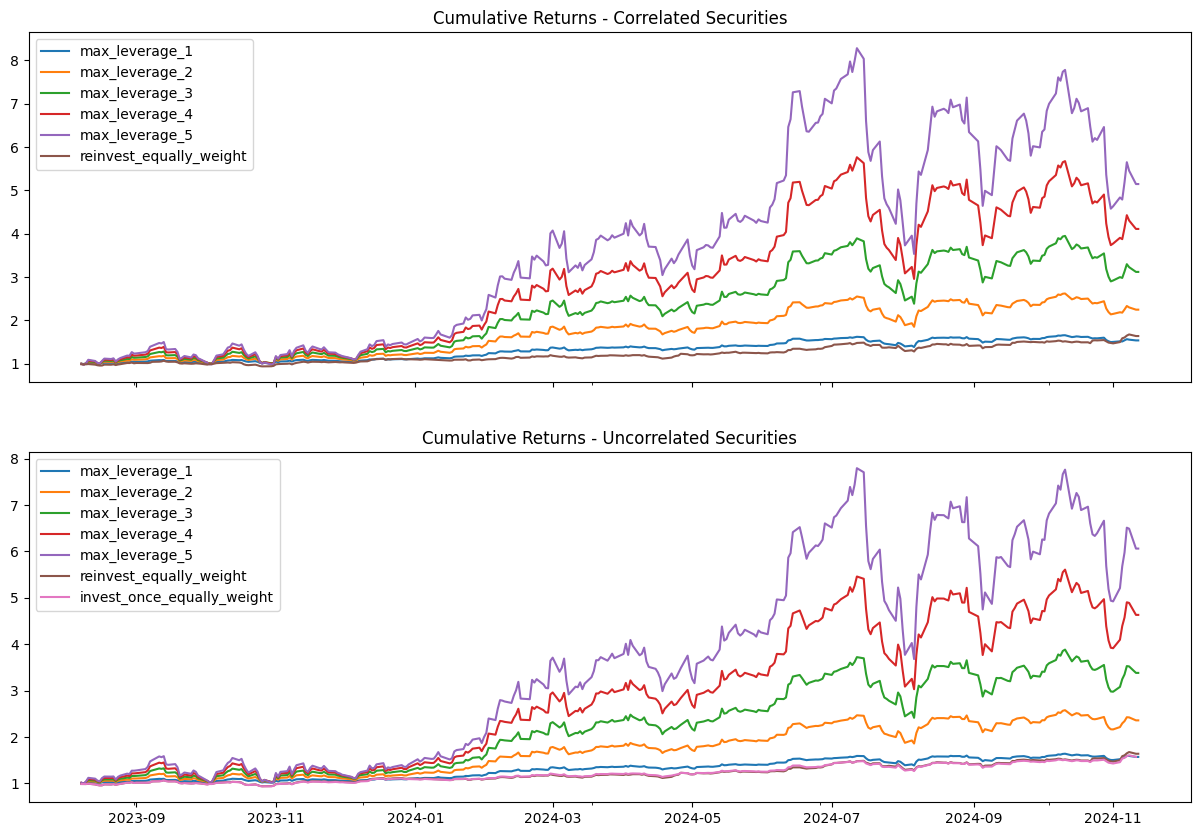

In [ ]:

shift_returns = returns.shift(-1)
leverages = range(1, 6)
start_date = opt_correlated_kelly.index[0]
shift_returns = shift_returns[start_date:]

total_returns_corr = backtest(opt_correlated_kelly, shift_returns, leverages)

# Perform backtests for uncorrelated securities
total_returns_uncorr = backtest(opt_uncorrelated_kelly, shift_returns, leverages)

n_companies = len(shift_returns.columns)
# Benchmark: one-time investment in equally weighted parts
cum_returns_ew = get_cumulative_returns(shift_returns) / n_companies
invest_once_equally_weight = cum_returns_ew.sum(axis=1)

# Benchmark: daily rebalancing to equally weighted parts
total_returns_corr['reinvest_equally_weight'] = shift_returns.sum(axis=1) / n_companies
total_returns_uncorr['reinvest_equally_weight'] = shift_returns.sum(axis=1) / n_companies

# Calculate cumulative returns for uncorrelated securities after backtest
cum_returns_uncorr = get_cumulative_returns(total_returns_uncorr)
cum_returns_uncorr['invest_once_equally_weight'] = invest_once_equally_weight

fig, ax = plt.subplots(nrows=2, figsize=(15, 10), sharex=True)

cum_returns_corr = get_cumulative_returns(total_returns_corr)
cum_returns_corr.plot(ax=ax[0])
ax[0].set_title('Cumulative Returns - Correlated Securities')

cum_returns_uncorr.plot(ax=ax[1])
ax[1].set_title('Cumulative Returns - Uncorrelated Securities')
plt.show()


The graphs use correlated (top) and uncorrelated (bottom) securities to show cumulative returns for various portfolio strategies. Returns are higher at higher leverage levels (max_leverage_1 to max_leverage_5), with max_leverage_5 producing the highest returns with higher risk and volatility. While uncorrelated assets exhibit greater stability but smaller gains, leverage has a greater effect on correlated securities, increasing returns because of their synchronized movements.

The lower returns from the non-leveraged reinvestment strategies ("reinvest_equally_weight" and "invest_once_equally_weight") demonstrate how leverage affects performance. These tactics, however, are less risky, which may make them appropriate for cautious investors. All things considered, reinvestment provides a more stable but less lucrative alternative to high-leverage strategies, which optimize returns at the expense of significant volatility and drawdowns.

## **5b**

**Background Information on the Kelly Criterion for Optimal Portfolio Allocation**

The Kelly Criterion, originally introduced by John L. Kelly Jr. in 1956, is a mathematical formula used to determine the optimal size of a series of bets or investments. The goal is to maximize the logarithm of wealth over time, achieving the highest possible long-term growth rate of capital. Though initially developed for applications in gambling, the Kelly Criterion has since been adapted to finance, particularly for portfolio management and asset allocation (Thorp, 2011). This section provides a detailed explanation of the mathematical foundation of the Kelly Criterion, describes the parameters involved, and discusses practical considerations for its application.

**Fundamental Equation of the Kelly Criterion**

The Kelly Criterion's core objective is to optimize portfolio allocation by balancing risk and reward, effectively maximizing the expected logarithmic growth of wealth. For a portfolio composed of multiple securities, the Kelly Criterion determines the optimal weights, $f_k$, assigned to each security $k$, subject to the constraint:

$$
f_0 + f_1 + \dots + f_n = 1
$$
where $f_0$ represents the allocation to a risk-free asset (such as cash or a bond), and $f_1$ through $f_n$ are the allocations to the $n$ risky assets in the portfolio. This constraint ensures that the entire portfolio is allocated, with no additional borrowing or leverage.

**Kelly Criterion for Uncorrelated Securities**

For scenarios where the securities are uncorrelated (i.e., each security's returns are independent of others), the Kelly Criterion simplifies. In such cases, the optimal fraction of the bankroll to allocate to each security, $f^*$, can be calculated as:

$$
f^* = \frac{bp - q}{b}
$$

where:
- $f^*$ is the fraction of the total bankroll to invest,
- $b$ is the net odds received on the wager (i.e., the ratio of profit to stake),
- $p$ is the probability of winning the bet,
- $q$ is the probability of losing the bet, with $q = 1 - p$ (Lv & Meister, 2011; Carta & Conversano, 2020; Byrnes & Barnett, 2018).

This formula indicates that the optimal fraction $f^*$ depends on both the probability of winning ($p$) and the odds ($b$), adjusting the investment size based on the perceived edge in the situation. For example, a higher probability of winning justifies a larger investment, while low odds may suggest caution due to a lower risk-to-reward ratio.

 **Interpretation of Parameters and Estimation**

The parameters $p$ and $b$ are critical inputs in the Kelly Criterion, as they influence the optimal allocation size. Estimating these parameters accurately is crucial, as inaccuracies can lead to suboptimal strategies. In a financial context, $p$ often represents the expected return of an asset, while $b$ reflects the level of risk or volatility associated with that investment (Chen, 2023; Thorp, 2011).

Estimation of these parameters can be challenging:

- **Expected Return ($p$)**: This can be estimated based on historical data or subjective probabilities. In financial markets, $p$ may correspond to the mean historical return of a stock or asset class, though this estimation assumes that past performance will be indicative of future returns.

- **Risk or Odds ($b$)**: The value of $b$ depends on the standard deviation of asset returns or other risk measures, such as the Sharpe ratio. For instance, a higher $b$ suggests that the asset offers higher potential returns relative to the stake or initial investment.

Since both parameters are estimated with some degree of uncertainty, investors need to be cautious, as overly optimistic estimates of $p$ or $b$ can lead to excessive risk-taking.

**Full Kelly Criterion for Correlated Securities**

When dealing with multiple correlated assets, the Kelly Criterion requires more sophisticated methods to determine the optimal allocation vector, $u = [u_1, u_2, ..., u_n]$, that maximizes the expected logarithmic growth of the portfolio. The formula is defined as:

$$
u^* = \arg \max_u \mathbb{E} \left[ \ln \left( (1 + r_f) + \sum_{k=1}^n u_k (r_k - r_f) \right) \right]
$$

where:
- $r_k$ is the expected return of asset $k$,
- $r_f$ is the return of the risk-free asset,
- $u_k$ represents the weight assigned to asset $k$.

This optimization problem maximizes the long-term compound growth rate by finding the vector of weights, $u^*$, that best allocates capital across the assets. Expanding this expression with a Taylor series, we obtain:

$$
u^* = \arg \max_u \left[ \ln(1 + r_f) + \frac{1}{1 + r_f} (r - r_f)^T u - \frac{1}{2(1 + r_f)^2} u^T \Sigma u \right]
$$

where $\Sigma$ is the covariance matrix of asset returns. This leads to a quadratic optimization problem that can be solved using convex optimization techniques (Lv & Meister, 2011; Carta & Conversano, 2020).

**Analytical Solution for the Unconstrained Case**

For the unconstrained case (allowing for short-selling and leverage), the solution simplifies to:

$$
u^* = (1 + r_f) \Sigma^{-1} (r - r_f)
$$

This analytical form enables rapid calculation of the Kelly optimal weights but may produce allocations that are infeasible for retail investors who cannot short-sell or take on significant leverage. In such cases, constraints must be imposed on $u_k$, ensuring that:

$$
u_k \geq 0, \quad \sum_{k=1}^n u_k = 1
$$

**Practical Application and Risk Mitigation**

The Kelly Criterion has shown to outperform other investment strategies over an infinite time horizon, particularly when maximizing long-term wealth is the investor's primary objective. For example, Ed Thorp successfully applied the Kelly Criterion in portfolio management, achieving annualized returns of 20% over 28 years (Thorp, 2011). However, in practical scenarios, the Kelly Criterion may suggest high-stake allocations that could be unsustainable due to real-world considerations like transaction costs, liquidity constraints, and taxes (Huo, 2024; Ma, 2023).

To address these limitations, investors often employ a "fractional Kelly" strategy, using a fraction (e.g., 1/4 or 1/2) of the full Kelly allocation. This approach reduces expected returns but significantly decreases volatility and downside risk. For example, a 1/4 Kelly allocation may reduce returns by 20%, while reducing variance by up to 80% (Davis & Lleo, 2013). This trade-off can provide a safer and more stable growth rate, especially for risk-averse investors.

**Interpretation of the Kelly Criterion's Parameters**

Understanding the Kelly Criterion parameters and their roles provides valuable insights for decision-making:
- **Higher Probability ($p$)**: A greater $p$ implies a higher likelihood of positive returns, supporting a larger allocation. In betting, this means a higher probability of winning the wager, leading to a more aggressive bet.
- **Lower Risk ($b$)**: Lower values of $b$ indicate that the potential returns do not sufficiently justify taking significant risks, suggesting a more conservative investment approach (Hsieh & Barmish, 2015). This insight is crucial for balancing growth potential with acceptable risk levels.

**Summary Table of Key Parameters and Their Interpretations**

| Parameter | Interpretation                        | Example Value          |
|-----------|--------------------------------------|-------------------------|
| $p$       | Probability of success               | Expected asset return   |
| $b$       | Odds or risk metric                  | Sharpe ratio            |
| $f^*$     | Optimal investment fraction          | Kelly wager percentage  |
| $\Sigma$  | Covariance matrix of asset returns   | Risk/volatility measure |

The Kelly Criterion offers a rigorous mathematical approach for balancing risk and reward, maximizing wealth growth while accounting for key parameters. However, due to the potential risks of overestimating parameters or underestimating uncertainties, practitioners often apply it with conservative adjustments to align with their specific risk tolerances and investment horizons.


# References:


1.	Araci, Dogu. FinBERT: Financial Sentiment Analysis with Pre-trained Language Models. arXiv:1908.10063, arXiv, 27 août 2019. arXiv.org, https://doi.org/10.48550/arXiv.1908.10063.
2.	Black, Fischer, and Robert Litterman. "Global Portfolio Optimization." Journal of Fixed Income, 1991.
3.	Black, Fischer, and Robert Litterman. Asset Allocation with Black-Litterman Model. Goldman Sachs Fixed Income Research Note, 1990.
4.	Byrnes, Tim, et al. "Generalized framework for applying the kelly criterion to stock markets". International Journal of Theoretical and Applied Finance, vol. 21, no. 05, 2018, p. 1850033. https://doi.org/10.1142/s0219024918500334
5.	Carta, Andrea, et al. "Practical implementation of the kelly criterion: optimal growth rate, number of trades, and rebalancing frequency for equity portfolios". Frontiers in Applied Mathematics and Statistics, vol. 6, 2020. https://doi.org/10.3389/fams.2020.577050
6.	Chawla, Karan. "The Kelly Criterion." Github. https://github.com/1kc2/The-Kelly-Criterion.
7.	Chen, Andrew, et al. "The kelly criterion: optimizing decision-making in risk management". FE, vol. 1, no. 3, 2023. https://doi.org/10.61173/6s089240
8.	Davis, Mark, et al. "Fractional kelly strategies in continuous time: recent developments"., 2013, p. 753-787. https://doi.org/10.1142/9789814417358_0037
9.	Hsieh, Chung-Han, et al. "On kelly betting: some limitations". 2015 53rd Annual Allerton Conference on Communication, Control, and Computing (Allerton), 2015. https://doi.org/10.1109/allerton.2015.7447000
10.	Idzorek, Thomas. "The Black-Litterman Model: A Practical Guide." Working Paper, 2005.
11.	Kirschenmann, Thomas. Cardiel - A portfolio allocation tool based on Black-Litterman. 2020. 25 octobre 2024. GitHub, https://github.com/thk3421-models/cardiel.
12.	Lo, Andrew, et al. "The growth of relative wealth and the kelly criterion". Journal of Bioeconomics, vol. 20, no. 1, 2017, p. 49-67. https://doi.org/10.1007/s10818-017-9253-z
13.	Lv, Yingdong, et al. "Application of the kelly criterion to ornstein-uhlenbeck processes"., 2011, p. 285-297. https://doi.org/10.1142/9789814293501_0021
14.	Meyer-Krebs, Martin. yf get_analysis. janvier 2023, https://mayerkrebs.com/yfinance-library-the-definitive-guide/#:~:text=is%20True.-,Fetch%20fundamental%20data%20using%20yfinance,-Yahoo%20Finance%20also.
15.	Pascual, Frederico. « Getting Started with Sentiment Analysis using Python ». Hugging Face, 2 février 2022, https://huggingface.co/blog/sentiment-analysis-python.
16.	Thorp, Edward, et al. "Portfolio choice and the kelly criterion"., 2011, p. 81-90. https://doi.org/10.1142/9789814293501_0007
17.	Yahoo Finance Staff. « Wall Street Stock Ratings and Price Targets Evaluated: Top Analysts Scoring Methodology Explained ». Yahoo Finance, 16 août 2024, https://finance.yahoo.com/news/wall-street-stock-ratings-price-163015011.html.

